<a href="https://colab.research.google.com/github/shadowww2802/Machine-Learning/blob/main/Elective_3_Testing_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [2]:
file_path = 'https://raw.githubusercontent.com/shadowww2802/Datasets/refs/heads/main/smart_home_device_usage_data.csv'

In [4]:
df = pd.read_csv(file_path)
df.head()

,UserID,DeviceType,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency
0,1,Smart Speaker,15.307188,1.961607,1,4,36,1
1,2,Camera,19.973343,8.610689,1,0,29,1
2,3,Security System,18.911535,2.651777,1,0,20,1
3,4,Camera,7.011127,2.341653,0,3,15,0
4,5,Camera,22.610684,4.859069,1,3,36,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5403 entries, 0 to 5402
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   UserID                5403 non-null   int64  
 1   DeviceType            5403 non-null   int64  
 2   UsageHoursPerDay      5403 non-null   float64
 3   EnergyConsumption     5403 non-null   float64
 4   UserPreferences       5403 non-null   int64  
 5   MalfunctionIncidents  5403 non-null   int64  
 6   DeviceAgeMonths       5403 non-null   int64  
 7   SmartHomeEfficiency   5403 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 337.8 KB


In [7]:
df.shape

(5403, 8)

In [8]:
df.isna().sum()

,0
UserID,0
DeviceType,0
UsageHoursPerDay,0
EnergyConsumption,0
UserPreferences,0
MalfunctionIncidents,0
DeviceAgeMonths,0
SmartHomeEfficiency,0


In [9]:
#Label Encoding using LabelEncoder for Categorical Data to Numerical Data

#create instance of label encoder
lab = LabelEncoder()

df['DeviceType'] = lab.fit_transform(df['DeviceType'])

df[:10]

,UserID,DeviceType,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency
0,1,3,15.307188,1.961607,1,4,36,1
1,2,0,19.973343,8.610689,1,0,29,1
2,3,2,18.911535,2.651777,1,0,20,1
3,4,0,7.011127,2.341653,0,3,15,0
4,5,0,22.610684,4.859069,1,3,36,1
5,6,4,3.422127,5.038625,1,0,3,1
6,7,2,21.065640,2.229344,0,0,56,0
7,8,2,23.317096,2.791421,0,0,53,0
8,9,2,4.663108,1.780082,1,2,23,1
9,10,0,17.468553,7.212756,1,4,58,0


In [10]:
x_temp = df.drop(columns='SmartHomeEfficiency')
y = df.SmartHomeEfficiency

In [11]:
x_temp

,UserID,DeviceType,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths
0,1,3,15.307188,1.961607,1,4,36
1,2,0,19.973343,8.610689,1,0,29
2,3,2,18.911535,2.651777,1,0,20
3,4,0,7.011127,2.341653,0,3,15
4,5,0,22.610684,4.859069,1,3,36
...,...,...,...,...,...,...,...
5398,5399,4,4.556314,5.871764,1,0,28
5399,5400,1,0.561856,1.555992,1,4,24
5400,5401,3,11.096236,7.677779,0,0,42
5401,5402,2,8.782169,7.467929,0,2,28


In [14]:
df.describe()

,UserID,DeviceType,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency
count,5403.000000,5403.000000,5403.000000,5403.000000,5403.000000,5403.000000,5403.000000,5403.000000
mean,2702.000000,1.980937,12.052992,5.054302,0.511753,2.066445,30.312234,0.376643
std,1559.856083,1.410874,6.714961,2.878941,0.499908,1.423291,16.990525,0.484589
min,1.000000,0.000000,0.501241,0.101562,0.000000,0.000000,1.000000,0.000000
25%,1351.500000,1.000000,6.297871,2.524968,0.000000,1.000000,15.000000,0.000000
50%,2702.000000,2.000000,11.903768,5.007047,1.000000,2.000000,30.000000,0.000000
75%,4052.500000,3.000000,17.791751,7.611912,1.000000,3.000000,45.000000,1.000000
max,5403.000000,4.000000,23.987326,9.998071,1.000000,4.000000,59.000000,1.000000


In [15]:
scaler = MinMaxScaler().fit_transform(x_temp)
x = pd.DataFrame(scaler, columns = x_temp.columns)
x.describe()

,UserID,DeviceType,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths
count,5403.000000,5403.000000,5403.000000,5403.000000,5403.000000,5403.000000,5403.000000
mean,0.500000,0.495234,0.491855,0.500453,0.511753,0.516611,0.505383
std,0.288755,0.352719,0.285912,0.290905,0.499908,0.355823,0.292940
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.250000,0.246811,0.244875,0.000000,0.250000,0.241379
50%,0.500000,0.500000,0.485501,0.495678,1.000000,0.500000,0.500000
75%,0.750000,0.750000,0.736202,0.758889,1.000000,0.750000,0.758621
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Inefficient: 3368
Efficient: 2035



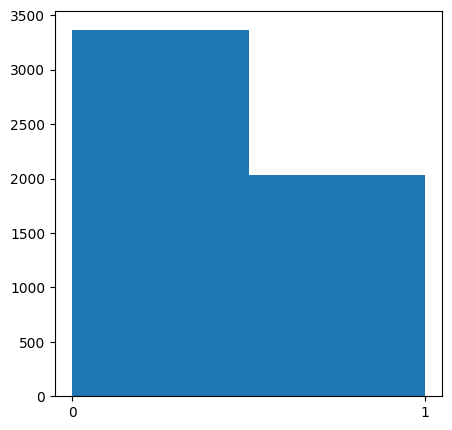

In [17]:
print(f"Inefficient: {df['SmartHomeEfficiency'].value_counts()[0]}")
print(f"Efficient: {df['SmartHomeEfficiency'].value_counts()[1]}\n")

plt.figure(figsize=(5,5))
plt.hist(df['SmartHomeEfficiency'], bins=2)
plt.xticks((0,1))
plt.show()

#Efficiency status of the smart home device (0 - Inefficient, 1 - Efficient).

In [18]:
df['SmartHomeEfficiency'].value_counts()

,count
SmartHomeEfficiency,
0,3368
1,2035


**RANDOM FOREST CLASSIFIER**

In [ ]:
# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Initialize K-Fold Cross-Validator
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Cross-Validation and Fitting
accuracy_scores = cross_val_score(rf_classifier, x, y, cv=kfold, scoring='accuracy')

# Display Results
for fold, accuracy in enumerate(accuracy_scores, start=1):
    print(f'Fold {fold}: Accuracy = {accuracy*100:.4f}%')

mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

print(f'\nMean Accuracy: {mean_accuracy*100:.4f}%')
print(f'Standard Deviation: {std_accuracy*100:.4f}%')

Fold 1: Accuracy = 95.3789%
Fold 2: Accuracy = 96.3031%
Fold 3: Accuracy = 94.8244%
Fold 4: Accuracy = 95.0000%
Fold 5: Accuracy = 96.2963%
Fold 6: Accuracy = 94.8148%
Fold 7: Accuracy = 95.3704%
Fold 8: Accuracy = 94.6296%
Fold 9: Accuracy = 94.6296%
Fold 10: Accuracy = 95.5556%

Mean Accuracy: 95.2803%
Standard Deviation: 0.5935%


In [ ]:
# Perform 10-Fold Cross-Validation
predicted_labels = cross_val_predict(rf_classifier, x, y, cv=kfold)

# Calculate performance measures
accuracy = accuracy_score(y, predicted_labels)
precision = precision_score(y, predicted_labels)
recall = recall_score(y, predicted_labels)
f1 = f1_score(y, predicted_labels)

# Calculate specificity and sensitivity from confusion matrix
conf_matrix = confusion_matrix(y, predicted_labels)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

# Display Results
print(f'Accuracy: {accuracy*100:.4f}%')
print(f'Precision: {precision*100:.4f}%')
print(f'Recall (Sensitivity): {recall*100:.4f}%')
print(f'Specificity: {specificity*100:.4f}%')
print(f'F1-score: {f1*100:.4f}%')

# Display Confusion Matrix
print('\nConfusion Matrix:')
print(conf_matrix)

# Classification Report
class_report = classification_report(y, predicted_labels)
print('\nClassification Report:')
print(class_report)


#store result for summary table later
results.append({
        'Classifier': "Random Forest",
        'Accuracy': accuracy * 100,
        'Precision': precision * 100,
        'Recall': recall * 100,
        'Specificity': specificity * 100,
        'F1-score': f1 * 100
    })

Accuracy: 95.2804%
Precision: 94.9495%
Recall (Sensitivity): 92.3833%
Specificity: 97.0309%
F1-score: 93.6488%

Confusion Matrix:
[[3268  100]
 [ 155 1880]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3368
           1       0.95      0.92      0.94      2035

    accuracy                           0.95      5403
   macro avg       0.95      0.95      0.95      5403
weighted avg       0.95      0.95      0.95      5403



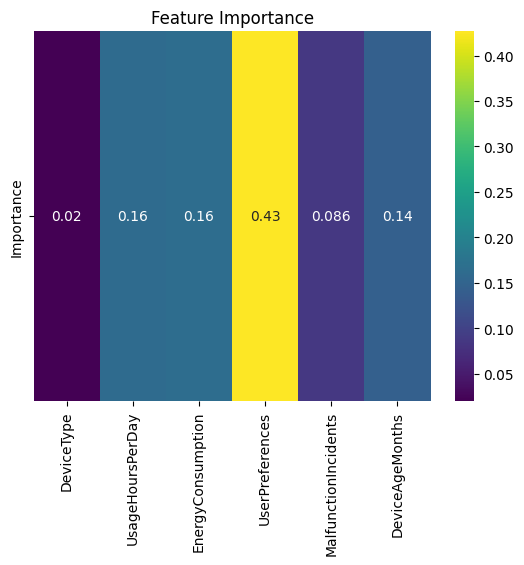

In [ ]:
rf_classifier.fit(x, y)
order = ['DeviceType', 'UsageHoursPerDay', 'EnergyConsumption', 'UserPreferences', 'MalfunctionIncidents', 'DeviceAgeMonths']
feature_importance = rf_classifier.feature_importances_
sns.heatmap(np.array([feature_importance]), annot=True, cmap='viridis', xticklabels=order, yticklabels=['Importance'])
plt.title('Feature Importance')
plt.show()

**SVM CLASSIFIER**

In [ ]:
svm_classifier = SVC(kernel='linear')

kfold =KFold(n_splits=10, shuffle=True, random_state=42)

accuracy_scores = cross_val_score(svm_classifier, x, y, cv=kfold)

for fold, accuracy in enumerate(accuracy_scores, start=1):
  print(f'Fold {fold}: Accuracy = {accuracy*100:.4f}%')

mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

print(f'\nMean Accuracy: {mean_accuracy*100:.4f}%')
print(f'Standard Deviation: {std_accuracy*100:.4f}%')

Fold 1: Accuracy = 87.2458%
Fold 2: Accuracy = 87.9852%
Fold 3: Accuracy = 85.9519%
Fold 4: Accuracy = 88.7037%
Fold 5: Accuracy = 88.5185%
Fold 6: Accuracy = 86.6667%
Fold 7: Accuracy = 89.2593%
Fold 8: Accuracy = 86.2963%
Fold 9: Accuracy = 86.2963%
Fold 10: Accuracy = 88.1481%

Mean Accuracy: 87.5072%
Standard Deviation: 1.1086%


In [ ]:
predicted_labels = cross_val_predict(svm_classifier, x, y, cv=kfold)

accuracy = accuracy_score(y, predicted_labels)
precision = precision_score(y, predicted_labels)
recall = recall_score(y, predicted_labels)
f1 = f1_score(y, predicted_labels)

conf_matrix = confusion_matrix(y, predicted_labels)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

print(f'Accuracy: {accuracy*100:.4f}%')
print(f'Precision: {precision*100:.4f}%')
print(f'Recall (Sensitivity): {recall*100:.4f}%')
print(f'Specificity: {specificity*100:.4f}%')
print(f'F1-score: {f1*100:.4f}%')

print('\nConfusion Matrix:')
print(conf_matrix)

class_report = classification_report(y, predicted_labels)
print('\nClassification Report:')
print(class_report)


#store result for summary table later
results.append({
        'Classifier': "SVM",
        'Accuracy': accuracy * 100,
        'Precision': precision * 100,
        'Recall': recall * 100,
        'Specificity': specificity * 100,
        'F1-score': f1 * 100
    })

Accuracy: 87.5069%
Precision: 83.2031%
Recall (Sensitivity): 83.7346%
Specificity: 89.7862%
F1-score: 83.4680%

Confusion Matrix:
[[3024  344]
 [ 331 1704]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      3368
           1       0.83      0.84      0.83      2035

    accuracy                           0.88      5403
   macro avg       0.87      0.87      0.87      5403
weighted avg       0.88      0.88      0.88      5403



**NAIVE BAYES CLASSIFIER**

In [ ]:
# Initialize Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Initialize K-Fold Cross-Validator
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Cross-Validation and Fitting
accuracy_scores = cross_val_score(nb_classifier, x, y, cv=kfold)

# Display Results
for fold, accuracy in enumerate(accuracy_scores, start=1):
    print(f'Fold {fold}: Accuracy = {accuracy*100:.4f}%')

mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

print(f'\nMean Accuracy: {mean_accuracy*100:.4f}%')
print(f'Standard Deviation: {std_accuracy*100:.4f}%')

Fold 1: Accuracy = 81.1460%
Fold 2: Accuracy = 87.4307%
Fold 3: Accuracy = 79.8521%
Fold 4: Accuracy = 82.4074%
Fold 5: Accuracy = 83.5185%
Fold 6: Accuracy = 81.8519%
Fold 7: Accuracy = 85.9259%
Fold 8: Accuracy = 83.1481%
Fold 9: Accuracy = 82.2222%
Fold 10: Accuracy = 83.1481%

Mean Accuracy: 83.0651%
Standard Deviation: 2.0996%


In [ ]:
# Perform 10-Fold Cross-Validation
predicted_labels = cross_val_predict(nb_classifier, x, y, cv=kfold)

# Calculate performance measures
accuracy = accuracy_score(y, predicted_labels)
precision = precision_score(y, predicted_labels)
recall = recall_score(y, predicted_labels)
f1 = f1_score(y, predicted_labels)

# Calculate specificity and sensitivity from confusion matrix
conf_matrix = confusion_matrix(y, predicted_labels)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

# Display Results
print(f'Accuracy: {accuracy*100:.4f}%')
print(f'Precision: {precision*100:.4f}%')
print(f'Recall (Sensitivity): {recall*100:.4f}%')
print(f'Specificity: {specificity*100:.4f}%')
print(f'F1-score: {f1*100:.4f}%')

# Display Confusion Matrix
print('\nConfusion Matrix:')
print(conf_matrix)

# Classification Report
class_report = classification_report(y, predicted_labels)
print('\nClassification Report:')
print(class_report)


#store result for summary table later
results.append({
        'Classifier': "Naive Bayes",
        'Accuracy': accuracy * 100,
        'Precision': precision * 100,
        'Recall': recall * 100,
        'Specificity': specificity * 100,
        'F1-score': f1 * 100
    })

Accuracy: 83.0650%
Precision: 72.0820%
Recall (Sensitivity): 89.8280%
Specificity: 78.9786%
F1-score: 79.9825%

Confusion Matrix:
[[2660  708]
 [ 207 1828]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.79      0.85      3368
           1       0.72      0.90      0.80      2035

    accuracy                           0.83      5403
   macro avg       0.82      0.84      0.83      5403
weighted avg       0.85      0.83      0.83      5403



In [ ]:
from tabulate import tabulate
# Convert the results to a DataFrame
results_df = pd.DataFrame(results)

# Display results in a formatted table
print("Performance Results of All Classifiers:\n")
print(results_df)

Performance Results of All Classifiers:

      Classifier   Accuracy  Precision     Recall  Specificity   F1-score
0  Random Forest  95.280400  94.949495  92.383292    97.030879  93.648817
1            SVM  87.506941  83.203125  83.734644    89.786223  83.468038
2    Naive Bayes  83.064964  72.082019  89.828010    78.978622  79.982498
